In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

X=dataset.iloc[:,3:-1]
Y=dataset.iloc[:,-1]
X.head()

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

X=pd.concat([X,geography,gender],axis=1)
X.drop(["Geography","Gender"],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.8)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [5]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7222 - loss: 0.5635 - val_accuracy: 0.7921 - val_loss: 0.4712
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8022 - loss: 0.4593 - val_accuracy: 0.7925 - val_loss: 0.4480
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7880 - loss: 0.4504 - val_accuracy: 0.7944 - val_loss: 0.4437
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8033 - loss: 0.4303 - val_accuracy: 0.8012 - val_loss: 0.4378
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8222 - loss: 0.4018 - val_accuracy: 0.8118 - val_loss: 0.4329
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8182 - loss: 0.4087 - val_accuracy: 0.8133 - val_loss: 0.4279
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8115 - loss: 0.4251 - val_accuracy: 0.8148 - val_loss: 0.4232
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8234 - loss: 0.4129 - val_accu

In [6]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [7]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"classification report {classification_report(y_test,y_pred)}")

[[1527   80]
 [ 201  192]]
accuracy 0.8595
classification report               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


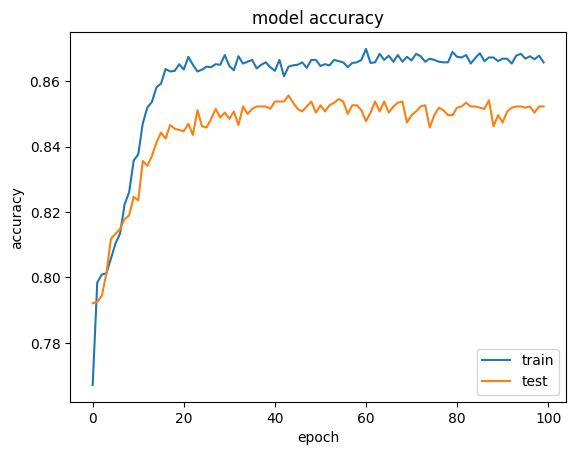

In [8]:
print(model.history.keys())
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()